In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
import numpy as np

In [9]:
# Create a data set for analysis
x, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)
y = y ** 2

In [10]:
# Pipeline lets us set the steps for our modeling
# We are comparing a standard polynomial model against one with ridge
model = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('linear', LinearRegression(fit_intercept=False))
])
regModel = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('ridge', Ridge(alpha=5.0))
])

In [11]:
# Now we train on our data
model = model.fit(x, y)

regModel = regModel.fit(x, y)

# Now we pridict
# The next two lines are used to model input for our prediction graph
x_plot = np.linspace(min(x)[0], max(x)[0], 100)
# print("shape x_plot", x_plot.shape)
# print(x_plot)
x_plot = x_plot[:, np.newaxis]
# print("shape x_plot", x_plot.shape)
# print(x_plot)
# y_predictions = model.predict(x_plot)
y_plot = model.predict(x_plot)
yReg_plot = regModel.predict(x_plot)

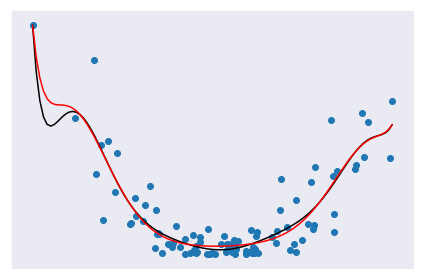

In [12]:
# plot the data
sns.set_style("darkgrid")
plt.plot(x_plot, y_plot, color='black')
plt.plot(x_plot, yReg_plot, color='red')
plt.scatter(x, y, marker='o')
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()